In [33]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr


In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201010.gz', '../BL_Work/openPrescribe/serialized/201012.gz']


In [3]:
patients = pd.read_csv('../BL_Work/grondTruths/gp-reg-patients-04-2013.csv')

In [4]:
patients = patients.dropna()

In [5]:
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['GP_PRACTICE_CODE']] = row['TOTAL_ALL']

In [6]:
prevalence_df = pd.read_csv('../BL_Work/grondTruths/PREVALENCE.csv')

In [7]:
diseaseMatched = json.load(open('../processed/DiseasesMatched.json','rb'))

In [8]:
%store -r Drug_code

In [11]:
%store  -r compre_postCode_dict

In [15]:
postCodeDict = compre_postCode_dict

In [9]:
def diseasePrevalenceArea( disease_presc, drug_prob , totalDrugs):
    diseaseGP_prevalence= []
    for name , group in disease_presc.groupby('3'):
        for code in drug_prob:
            if code in name:
#                 prev = (float(len(group))/float(practice_population+1)) * drug_prob[code]['disease_given_drug']
#                 print len(group) , totalDrugs
                prev = (float(len(group))/float(totalDrugs)) * drug_prob[code]['disease_given_drug']
                diseaseGP_prevalence.append(prev)
    return np.sum(diseaseGP_prevalence)


In [12]:
presc_Disease_prevalence_area = {}
missing_pract = []
for f in tqdm(files[:1]):
    month = f.split('/')[-1].split('.')[0]
    print "Working with %s month"%(month)
    presc_Disease_prevalence_area[month] = {}
    pdp = pd.read_csv(f,compression='gzip')
    print "there are in total %d practices in this file"%(len(set(pdp['2'])))
    pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)
    
    for area in tqdm(compre_postCode_dict):
        codes = compre_postCode_dict[area]['postcodes']
        area_df = pdp[pdp['10'].isin(codes)]
        all_diseases = area_df[area_df['12'].notnull()]
        total_drugs = len(all_diseases)
#         for d in tqdm(['diabetes','depression']):
        for d in tqdm(diseaseMatched):
            key = d.replace('\"','').replace('+',' ').replace('\\','')
            if key not in  presc_Disease_prevalence_area[month]:
                 presc_Disease_prevalence_area[month][key] = {}
            disease_df = area_df[area_df['12'] == key]
            if len(disease_df) == 0:
                presc_Disease_prevalence_area[month][key][area] = 0.0
            else:
                presc_Disease_prevalence_area[month][key][area] = diseasePrevalenceArea (disease_df ,Drug_code , total_drugs)



  0%|          | 0/1 [00:00<?, ?it/s]

Working with 201009 month



Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/tqdm/_tqdm.py", line 148, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



there are in total 10265 practices in this file




  0%|          | 0/348 [00:00<?, ?it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 50%|█████     | 9/18 [00:00<00:00, 87.34it/s]


100%|██████████| 18/18 [00:00<00:00, 82.63it/s]




  0%|          | 1/348 [00:00<02:42,  2.13it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 58.89it/s]


100%|██████████| 18/18 [00:00<00:00, 74.69it/s]




  1%|          | 2/348 [00:01<03:12,  1.79it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 39%|███▉      | 7/18 [00:00<00:00, 67.05it/s]


100%|██████████| 18/18 [00:00<00:00, 77.27it/s]




  1%|          | 3/348 [00:01<03:03,  1.88it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 133.14it/s]


100%|██████████| 18/18 [00:00<00:00, 106.01it/s]

  1%|          | 4/348 [00:02<02:52,  1.99it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 61%|██████    | 11/18 [00:00<00:00, 106.67it/s]


100%|██████████| 18/18 [00:00<00:00, 93.52it/s] 

  1%|▏         | 5/348 [00:02<02:46,  2.07it/s

100%|██████████| 18/18 [00:00<00:00, 56.24it/s]

  9%|▉         | 33/348 [00:16<02:36,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 50%|█████     | 9/18 [00:00<00:00, 88.50it/s]


100%|██████████| 18/18 [00:00<00:00, 82.62it/s]




 10%|▉         | 34/348 [00:16<02:35,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 72%|███████▏  | 13/18 [00:00<00:00, 126.07it/s]


100%|██████████| 18/18 [00:00<00:00, 96.58it/s] 

 10%|█         | 35/348 [00:17<02:34,  2.03it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 151.56it/s]


100%|██████████| 18/18 [00:00<00:00, 121.90it/s]

 10%|█         | 36/348 [00:17<02:32,  2.04it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 67%|██████▋   | 12/18 [00:00<00:00, 116.31it/s]


100%|██████████| 18/18 [00:00<00:00, 94.19it/s] 

 11%|█         | 37/348 [00:18<02:32,  2.04it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 56.80it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 8

100%|██████████| 18/18 [00:00<00:00, 77.25it/s]




 19%|█▉        | 66/348 [00:32<02:19,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 28%|██▊       | 5/18 [00:00<00:00, 47.97it/s]


 39%|███▉      | 7/18 [00:00<00:00, 31.41it/s]


 72%|███████▏  | 13/18 [00:00<00:00, 39.12it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 38.00it/s]


100%|██████████| 18/18 [00:00<00:00, 34.50it/s]

 19%|█▉        | 67/348 [00:33<02:21,  1.99it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 53.20it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 73.92it/s]


100%|██████████| 18/18 [00:00<00:00, 63.31it/s]

 20%|█▉        | 68/348 [00:34<02:21,  1.98it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 50%|█████     | 9/18 [00:00<00:00, 87.31it/s]


100%|██████████| 18/18 [00:00<00:00, 82.41it/s]




 20%|█▉        | 69/348 [00:34<02:21,  1.98it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 56%|█████▌    | 10/18 [00:00<00:00, 96.37it/s]


100%|██████████| 18/18 [00:00<00:0

 83%|████████▎ | 15/18 [00:00<00:00, 59.80it/s]


100%|██████████| 18/18 [00:00<00:00, 51.38it/s]

 28%|██▊       | 99/348 [00:49<02:04,  2.00it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 39%|███▉      | 7/18 [00:00<00:00, 68.25it/s]


100%|██████████| 18/18 [00:00<00:00, 79.20it/s]




 29%|██▊       | 100/348 [00:49<02:03,  2.00it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 44%|████▍     | 8/18 [00:00<00:00, 77.84it/s]


100%|██████████| 18/18 [00:00<00:00, 78.23it/s]




 29%|██▉       | 101/348 [00:50<02:03,  2.00it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 1625.14it/s]

 29%|██▉       | 102/348 [00:50<02:02,  2.01it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 132.24it/s]


100%|██████████| 18/18 [00:00<00:00, 106.53it/s]

 30%|██▉       | 103/348 [00:51<02:01,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 44%|████▍     | 8/18 [00:00<00:00, 78.87it/s]


100%|██████████| 18/18 [00:00<00:0

 39%|███▉      | 7/18 [00:00<00:00, 69.18it/s]


100%|██████████| 18/18 [00:00<00:00, 80.50it/s]




 38%|███▊      | 133/348 [01:05<01:46,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 78%|███████▊  | 14/18 [00:00<00:00, 136.58it/s]


100%|██████████| 18/18 [00:00<00:00, 100.61it/s]

 39%|███▊      | 134/348 [01:06<01:45,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 54.49it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 77.59it/s]


100%|██████████| 18/18 [00:00<00:00, 66.27it/s]

 39%|███▉      | 135/348 [01:06<01:45,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 40.90it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 54.92it/s]


100%|██████████| 18/18 [00:00<00:00, 47.38it/s]




 39%|███▉      | 136/348 [01:07<01:45,  2.01it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 50%|█████     | 9/18 [00:00<00:00, 88.91it/s]


100%|██████████| 18/18 [00:00<00:00, 80.97it/s]




 39%|███▉      | 137/348 [

100%|██████████| 18/18 [00:00<00:00, 96.52it/s] 

 48%|████▊     | 166/348 [01:21<01:29,  2.03it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 58.87it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 84.00it/s]


100%|██████████| 18/18 [00:00<00:00, 71.39it/s]

 48%|████▊     | 167/348 [01:22<01:29,  2.02it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 39%|███▉      | 7/18 [00:00<00:00, 68.40it/s]


100%|██████████| 18/18 [00:00<00:00, 76.04it/s]




 48%|████▊     | 168/348 [01:22<01:28,  2.03it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 1416.54it/s]

 49%|████▊     | 169/348 [01:23<01:28,  2.03it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 1636.34it/s]

 49%|████▉     | 170/348 [01:23<01:27,  2.04it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 148.23it/s]




 49%|████▉     | 171/348 [01:23<01:26,  2.04it/s]


  0%|          | 0/18 [00:00<

 94%|█████████▍| 17/18 [00:00<00:00, 77.12it/s]


100%|██████████| 18/18 [00:00<00:00, 66.69it/s]

 57%|█████▋    | 200/348 [01:38<01:12,  2.03it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 57.39it/s]


100%|██████████| 18/18 [00:00<00:00, 74.41it/s]




 58%|█████▊    | 201/348 [01:38<01:12,  2.04it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 61%|██████    | 11/18 [00:00<00:00, 103.64it/s]


100%|██████████| 18/18 [00:00<00:00, 87.78it/s] 

 58%|█████▊    | 202/348 [01:39<01:11,  2.04it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 36.89it/s]


 78%|███████▊  | 14/18 [00:00<00:00, 51.17it/s]


100%|██████████| 18/18 [00:00<00:00, 43.09it/s]




 58%|█████▊    | 203/348 [01:39<01:11,  2.03it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 44%|████▍     | 8/18 [00:00<00:00, 78.93it/s]


100%|██████████| 18/18 [00:00<00:00, 80.34it/s]




 59%|█████▊    | 204/348 [01:40<01:10,  2.03it/s]


  0%|          | 0/18 [



 67%|██████▋   | 234/348 [01:54<00:55,  2.04it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 67%|██████▋   | 12/18 [00:00<00:00, 116.55it/s]


100%|██████████| 18/18 [00:00<00:00, 98.98it/s] 

 68%|██████▊   | 235/348 [01:54<00:55,  2.05it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 142.26it/s]


100%|██████████| 18/18 [00:00<00:00, 109.31it/s]

 68%|██████▊   | 236/348 [01:55<00:54,  2.05it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 141.58it/s]


100%|██████████| 18/18 [00:00<00:00, 111.71it/s]

 68%|██████▊   | 237/348 [01:55<00:54,  2.05it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 44%|████▍     | 8/18 [00:00<00:00, 79.01it/s]


100%|██████████| 18/18 [00:00<00:00, 80.44it/s]




 68%|██████▊   | 238/348 [01:56<00:53,  2.05it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 44%|████▍     | 8/18 [00:00<00:00, 77.98it/s]


100%|██████████| 18/18 [00:00<00:00, 80.64it/s]




 69%|██████▊   | 239/348 [01

 33%|███▎      | 6/18 [00:00<00:00, 58.74it/s]


100%|██████████| 18/18 [00:00<00:00, 73.71it/s]




 77%|███████▋  | 269/348 [02:10<00:38,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 55.26it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 76.92it/s]


100%|██████████| 18/18 [00:00<00:00, 66.24it/s]

 78%|███████▊  | 270/348 [02:11<00:37,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 141.95it/s]


100%|██████████| 18/18 [00:00<00:00, 112.37it/s]

 78%|███████▊  | 271/348 [02:11<00:37,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 57.67it/s]


100%|██████████| 18/18 [00:00<00:00, 72.13it/s]




 78%|███████▊  | 272/348 [02:11<00:36,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 52.80it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 74.87it/s]


100%|██████████| 18/18 [00:00<00:00, 63.92it/s]

 78%|███████▊  | 273/348 [02:

  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 46.58it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 65.50it/s]


100%|██████████| 18/18 [00:00<00:00, 56.51it/s]

 87%|████████▋ | 304/348 [02:27<00:21,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 54.60it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 75.83it/s]


100%|██████████| 18/18 [00:00<00:00, 65.34it/s]

 88%|████████▊ | 305/348 [02:27<00:20,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 55.86it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 80.60it/s]


100%|██████████| 18/18 [00:00<00:00, 68.88it/s]

 88%|████████▊ | 306/348 [02:28<00:20,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 53.05it/s]


 94%|█████████▍| 17/18 [00:00<00:00, 75.08it/s]


100%|██████████| 18/18 [00:00<00:00, 64.59it/s]

 88%|████████▊ | 307/348 [02:28<00:19,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/

  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 49.39it/s]


 89%|████████▉ | 16/18 [00:00<00:00, 70.36it/s]


100%|██████████| 18/18 [00:00<00:00, 58.11it/s]

 97%|█████████▋| 337/348 [02:43<00:05,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 45.62it/s]


 83%|████████▎ | 15/18 [00:00<00:00, 62.77it/s]


100%|██████████| 18/18 [00:00<00:00, 54.52it/s]

 97%|█████████▋| 338/348 [02:44<00:04,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 33%|███▎      | 6/18 [00:00<00:00, 57.94it/s]


100%|██████████| 18/18 [00:00<00:00, 74.70it/s]




 97%|█████████▋| 339/348 [02:44<00:04,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 67%|██████▋   | 12/18 [00:00<00:00, 116.33it/s]


100%|██████████| 18/18 [00:00<00:00, 95.07it/s] 

 98%|█████████▊| 340/348 [02:45<00:03,  2.06it/s]


  0%|          | 0/18 [00:00<?, ?it/s]


 61%|██████    | 11/18 [00:00<00:00, 102.47it/s]


100%|██████████| 18/18 [00:00<00:00, 8

In [13]:
pdp = pd.read_csv(files[-1],compression='gzip')
GP_postcodes = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes[name] = str(postcode[0]).split(' ')[0]
        

In [16]:
area_patients = {}
for k in GP_postcodes:
    postCode = GP_postcodes[k]
    for area in postCodeDict:
        if postCode in postCodeDict[area]['postcodes']:
            try:
                if area not in area_patients:
                    area_patients[area] = practice_patient_dict[k]
                else:
                    area_patients[area] += practice_patient_dict[k]
            except:
                continue

area_patients_filtered = {k: area_patients[k] for k in area_patients if not np.isnan(area_patients[k] )}

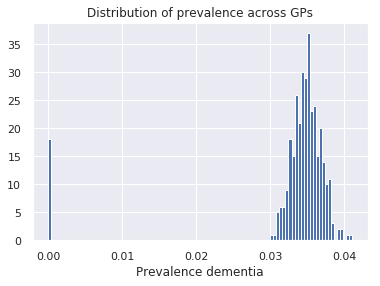

In [17]:
filtered = [k for k in presc_Disease_prevalence_area['201009']['depression'].values() if not np.isnan(k)]
plt.hist(filtered,bins=100)
ax = plt.gca()
ax.set_title("Distribution of prevalence across GPs")
ax.set_xlabel("Prevalence dementia")
ax.set_ylabel("")

In [144]:
Area_Gt = pd.read_csv('../BL_Work/prevalence_LA_level/DEP_LA_level.csv')

In [145]:
%store -r lon_boro

In [146]:
area_prevalence = presc_Disease_prevalence_area['201009']['depression']

In [147]:
presc_Disease_prevalence_area['201009'].keys()

[u'psoriasis',
 u'chronic fatigue syndrome',
 u'kidney stones',
 u'sleep apnea',
 u"crohn's disease",
 u'rheumatoid',
 u'irritable bowel syndrome',
 u'parkinsons',
 u'dysautonomia',
 u'interstitial cystitis',
 u'bipolar',
 u'dementia',
 u'hypothyroidism',
 u"Meniere's disease",
 u'multiple sclerosis',
 u'gastroparesis',
 u'depression',
 u'diabetes']

In [148]:
list(set(area_prevalence.keys()).intersection(Area_Gt['Area']))

['Mendip',
 'Windsor and Maidenhead',
 'Hambleton',
 'Ipswich',
 'Castle Point',
 'Rochdale',
 'Liverpool',
 'Kirklees',
 'Epsom and Ewell',
 'Sefton',
 'Bury',
 'Kettering',
 'Luton',
 'South Gloucestershire',
 'Solihull',
 'South Lakeland',
 'Chesterfield',
 'East Devon',
 'Hartlepool',
 'Nottingham',
 'Eastbourne',
 'Kingston upon Hull, City of',
 'North Kesteven',
 'Southend-on-Sea',
 'Winchester',
 'Staffordshire Moorlands',
 'Redditch',
 'Hammersmith and Fulham',
 'Breckland',
 'Bristol, City of',
 'The Vale of Glamorgan',
 'Pendle',
 'Sheffield',
 'Newcastle upon Tyne',
 'North Dorset',
 'Stevenage',
 'High Peak',
 'South Bucks',
 'Arun',
 'Trafford',
 'Wolverhampton',
 'Northampton',
 'Richmond upon Thames',
 'Doncaster',
 'East Dorset',
 'Torridge',
 'Copeland',
 'Greenwich',
 'Lewisham',
 'Islington',
 'Newham',
 'Conwy',
 'Bath and North East Somerset',
 'East Hertfordshire',
 'Tameside',
 'Chichester',
 'Tamworth',
 'North Norfolk',
 'Mid Devon',
 'St Albans',
 'Mid Sussex'

In [149]:
# subAreas = lon_boro
subAreas = list(set(area_prevalence.keys()).intersection(Area_Gt['Area']))

In [171]:
predict = []
gt = []
names = []
for index, row in Area_Gt.iterrows():
    if row['Area'].strip() in subAreas:
        if row['weighted_mean'] >= 0: 
            if area_patients[row['Area'].strip()] > 600000:# and area_patients[row['Area'].strip()] < 2000000:
#             if row['Area'] in area_prevalence:
#             predict.append(area_prevalence[row['Area'].strip()]['norm'])
                predict.append(area_prevalence[row['Area']])
                names.append(row['Area'].strip())
                gt.append(row['weighted_mean'])

In [172]:
pearsonr(predict,gt)

(0.7438339455239826, 7.244397266082475e-05)

In [173]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

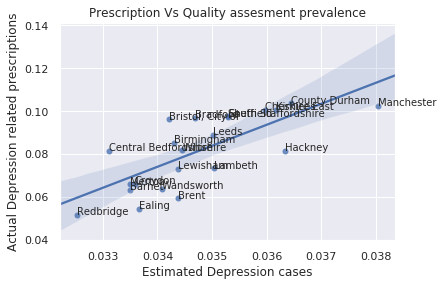

In [174]:
sns.regplot(x=predict , y = gt)
ax = plt.gca()
label_point(predict , gt , names , ax)
ax.set_title("Prescription Vs Quality assesment prevalence")
ax.set_xlabel("Estimated Depression cases")
ax.set_ylabel("Actual Depression related prescriptions")